In [12]:
import pandas as pd
import os

# Caminho para a pasta contendo os arquivos CSV
metSuperficiePath = 'C:/Users/marcos perrude/Downloads/poluicao/ENS5173_202401/inputs/dadoshidro'
# Lista para armazenar os dados de cada arquivo
metSuperficie = []

# Iterando sobre cada arquivo na pasta
for file in os.listdir(metSuperficiePath):
    # Verificando se o arquivo tem extensão .csv
    if file.endswith('.csv'):
        # Lendo o arquivo CSV
        df = pd.read_csv(os.path.join(metSuperficiePath, file))
        # Verificando se o DataFrame não está vazio
        if not df.empty:
            # Adicionando o DataFrame à lista
            metSuperficie.append(df)

# Convertendo a lista de DataFrames para um único DataFrame
if metSuperficie:
    metSuperficie = pd.concat(metSuperficie, ignore_index=True)
else:
    metSuperficie = pd.DataFrame()  # Caso a lista esteja vazia, criando um DataFrame vazio

print(metSuperficie)
print(type(metSuperficie))

     day  month  year       Data  Media  Vazao01  Vazao02  Vazao03  Vazao04  \
0      1      1  1980   1/1/1980     49       59       54       51       49   
1      1      2  1980   1/2/1980     52       51       43       40       38   
2      1      3  1980   1/3/1980     57      104       86       64       67   
3      1      4  1980   1/4/1980     40       40       40       42       49   
4      1      5  1980   1/5/1980     50       33       35       34       34   
..   ...    ...   ...        ...    ...      ...      ...      ...      ...   
427    1      8  2015   1/8/2015     70       84       82       79       78   
428    1      9  2015   1/9/2015     77       60       59       57       56   
429    1     10  2015  1/10/2015     88       94       91       98      148   
430    1     11  2015  1/11/2015    166       71       73       74       83   
431    1     12  2015  1/12/2015    160      203      183      175      177   

     Vazao05  ...  Vazao22  Vazao23  Vazao24  Vazao

In [13]:
# Criar uma coluna com Datetime dos dados

# Criar uma coluna de data as colunas separadas
metSuperficie['datetime'] = pd.to_datetime(metSuperficie[['year', 'month', 'day',]])
print(metSuperficie['datetime'])

# Definido a coluna de datetime como índice da matriz
metSuperficie.set_index(metSuperficie['datetime'])

0     1980-01-01
1     1980-02-01
2     1980-03-01
3     1980-04-01
4     1980-05-01
         ...    
427   2015-08-01
428   2015-09-01
429   2015-10-01
430   2015-11-01
431   2015-12-01
Name: datetime, Length: 432, dtype: datetime64[ns]


,day,month,year,Data,Media,Vazao01,Vazao02,Vazao03,Vazao04,Vazao05,...,Vazao23,Vazao24,Vazao25,Vazao26,Vazao27,Vazao28,Vazao29,Vazao30,Vazao31,datetime
datetime,,,,,,,,,,,,,,,,,,,,,
1980-01-01,1,1,1980,1/1/1980,49,59,54,51,49,48,...,42,52,63,51,44,43,42.0,41.0,42.0,1980-01-01
1980-02-01,1,2,1980,1/2/1980,52,51,43,40,38,37,...,38,37,40,82,164,144,117.0,0.0,0.0,1980-02-01
1980-03-01,1,3,1980,1/3/1980,57,104,86,64,67,59,...,45,44,43,43,42,42,41.0,41.0,41.0,1980-03-01
1980-04-01,1,4,1980,1/4/1980,40,40,40,42,49,47,...,35,35,35,35,34,34,34.0,33.0,0.0,1980-04-01
1980-05-01,1,5,1980,1/5/1980,50,33,35,34,34,33,...,133,81,58,51,48,45,45.0,44.0,42.0,1980-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-08-01,1,8,2015,1/8/2015,70,84,82,79,78,77,...,63,64,73,69,71,76,70.0,65.0,63.0,2015-08-01
2015-09-01,1,9,2015,1/9/2015,77,60,59,57,56,77,...,57,56,54,78,85,84,87.0,93.0,NaN,2015-09-01
2015-10-01,1,10,2015,1/10/2015,88,94,91,98,148,91,...,80,90,85,78,73,75,73.0,70.0,69.0,2015-10-01


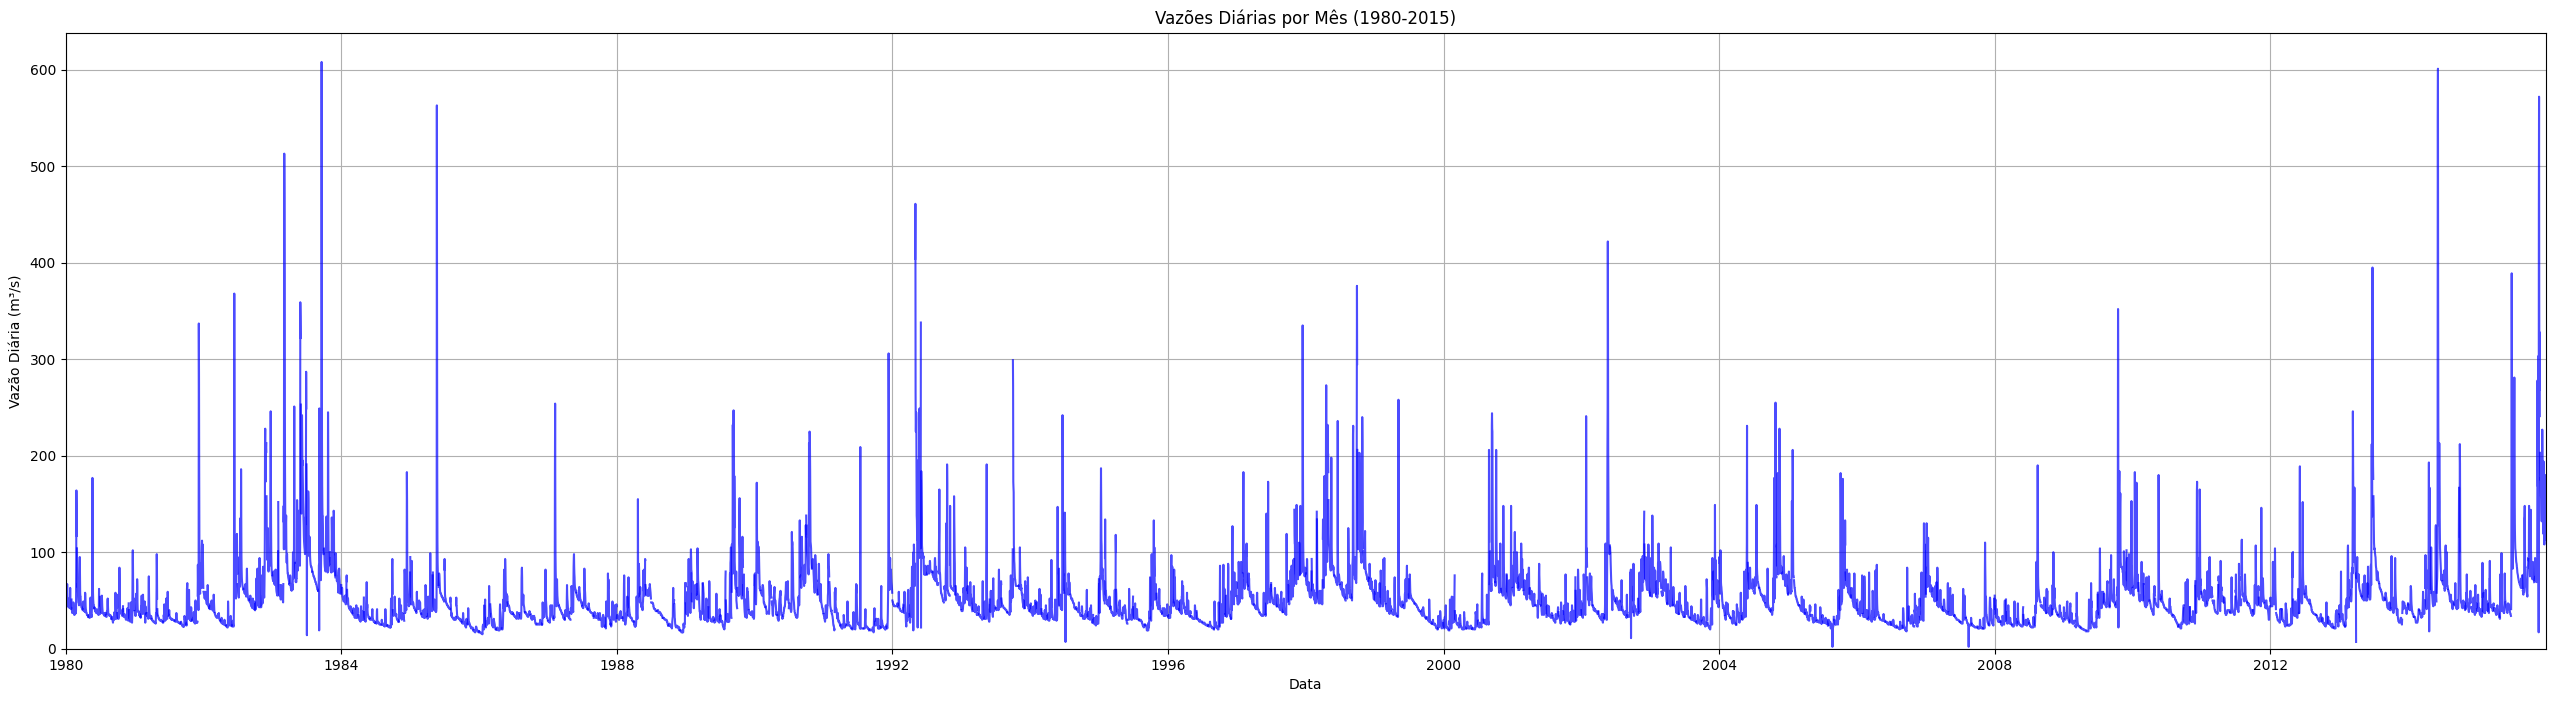

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que metSuperficie seja um DataFrame com as colunas 'datetime', 'Vazao01', 'Vazao02', ..., 'Vazao31'
# Se necessário, converter a coluna 'datetime' para datetime
metSuperficie['datetime'] = pd.to_datetime(metSuperficie['datetime'], errors='coerce')

# Limpar dados das colunas de vazão para garantir que sejam numéricos
colunas_vazoes = ['Vazao01', 'Vazao02', 'Vazao03', 'Vazao04', 'Vazao05', 'Vazao06',
                  'Vazao07', 'Vazao08', 'Vazao09', 'Vazao10', 'Vazao11', 'Vazao12',
                  'Vazao13', 'Vazao14', 'Vazao15', 'Vazao16', 'Vazao17', 'Vazao18',
                  'Vazao19', 'Vazao20', 'Vazao21', 'Vazao22', 'Vazao23', 'Vazao24',
                  'Vazao25', 'Vazao26', 'Vazao27', 'Vazao28', 'Vazao29', 'Vazao30', 'Vazao31']

for coluna in colunas_vazoes:
    metSuperficie[coluna] = pd.to_numeric(metSuperficie[coluna], errors='coerce')

# Filtrar linhas onde datetime não é NaN e pelo menos uma coluna de vazão não é NaN
metSuperficie = metSuperficie.dropna(subset=['datetime'])
metSuperficie = metSuperficie.dropna(how='all', subset=colunas_vazoes)

# Filtrando os dados para o intervalo desejado (1980 a 2015)
metSuperficie_filtrado = metSuperficie[(metSuperficie['datetime'].dt.year >= 1980) & (metSuperficie['datetime'].dt.year <= 2015)]

# Agrupar por mês e plotar os resultados diários de cada mês em um mesmo gráfico
plt.figure(figsize=(32, 8))

for mes in range(1, 13):  # Iterar sobre os meses de janeiro (1) a dezembro (12)
    # Filtrar os dados para o mês atual
    dados_mes = metSuperficie_filtrado[metSuperficie_filtrado['datetime'].dt.month == mes]
    
    # Plotar as vazões diárias para este mês
    for index, row in dados_mes.iterrows():
        data_base = row['datetime']
        vazoes_diarias = row[colunas_vazoes].dropna()
        
        if not vazoes_diarias.empty:  # Verificar se há vazões não nulas para plotar
            # Criar uma série de datas para o mês correspondente
            datas_mes = []
            for i in range(len(vazoes_diarias)):
                try:
                    datas_mes.append(data_base.replace(day=i+1))
                except ValueError:
                    break  # Se o dia for inválido, interromper o loop
            
            # Plotar as vazões diárias para este mês
            plt.plot(datas_mes, vazoes_diarias[:len(datas_mes)], color='blue', alpha=0.7)  # Usar a mesma cor azul para todas as linhas

# Configurar o eixo X para iniciar em 1980 e terminar em 2015
plt.xlim(pd.Timestamp('1980-01-01'), pd.Timestamp('2015-12-31'))
plt.xlabel('Data')
plt.ylabel('Vazão Diária (m³/s)')
plt.title('Vazões Diárias por Mês (1980-2015)')
plt.ylim(0)  # Começar o eixo Y a partir de 0
plt.grid(True)

plt.savefig('vazoes_diarias.png', dpi=300, bbox_inches='tight')

plt.show()

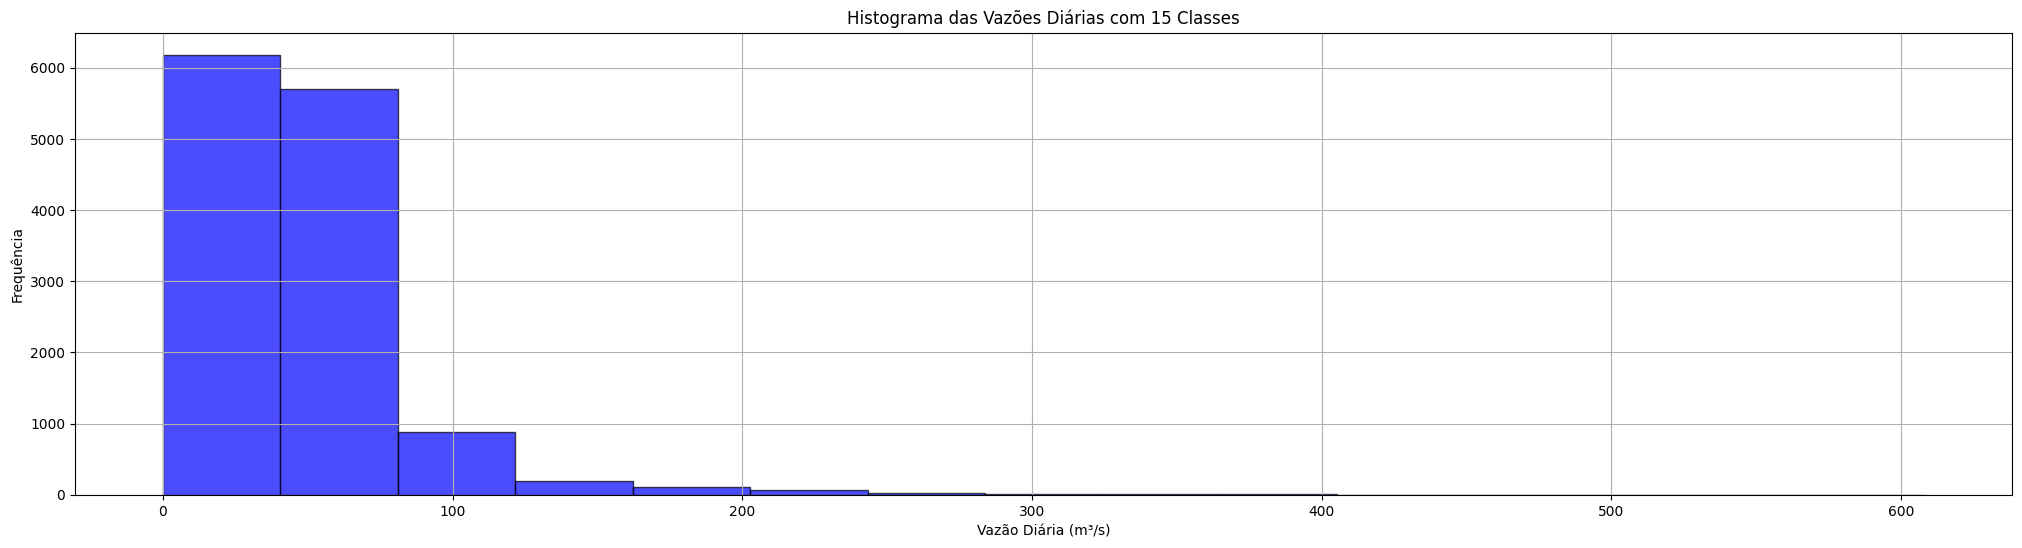

Contagem de Observações em Cada Classe:
Classe 0.00-40.53: 6184 observações
Classe 40.53-81.07: 5700 observações
Classe 81.07-121.60: 875 observações
Classe 121.60-162.13: 186 observações
Classe 162.13-202.67: 113 observações
Classe 202.67-243.20: 64 observações
Classe 243.20-283.73: 25 observações
Classe 283.73-324.27: 9 observações
Classe 324.27-364.80: 12 observações
Classe 364.80-405.33: 8 observações
Classe 405.33-445.87: 1 observações
Classe 445.87-486.40: 3 observações
Classe 486.40-526.93: 1 observações
Classe 526.93-567.47: 2 observações
Classe 567.47-608.00: 3 observações


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Supondo que metSuperficie seja um DataFrame com as colunas 'datetime', 'Vazao01', 'Vazao02', ..., 'Vazao31'
# Se necessário, converter a coluna 'datetime' para datetime
metSuperficie['datetime'] = pd.to_datetime(metSuperficie['datetime'], errors='coerce')

# Limpar dados das colunas de vazão para garantir que sejam numéricos
colunas_vazoes = ['Vazao01', 'Vazao02', 'Vazao03', 'Vazao04', 'Vazao05', 'Vazao06',
                  'Vazao07', 'Vazao08', 'Vazao09', 'Vazao10', 'Vazao11', 'Vazao12',
                  'Vazao13', 'Vazao14', 'Vazao15', 'Vazao16', 'Vazao17', 'Vazao18',
                  'Vazao19', 'Vazao20', 'Vazao21', 'Vazao22', 'Vazao23', 'Vazao24',
                  'Vazao25', 'Vazao26', 'Vazao27', 'Vazao28', 'Vazao29', 'Vazao30', 'Vazao31']

for coluna in colunas_vazoes:
    metSuperficie[coluna] = pd.to_numeric(metSuperficie[coluna], errors='coerce')

# Filtrar linhas onde datetime não é NaN e pelo menos uma coluna de vazão não é NaN
metSuperficie = metSuperficie.dropna(subset=['datetime'])
metSuperficie = metSuperficie.dropna(how='all', subset=colunas_vazoes)

# Consolidar todas as vazões em uma única array
vazoes_consolidadas = metSuperficie[colunas_vazoes].values.ravel()
vazoes_consolidadas = vazoes_consolidadas[~np.isnan(vazoes_consolidadas)]  # Remover NaNs

# Calcular o histograma com 15 classes
num_bins = 15
hist, bins = np.histogram(vazoes_consolidadas, bins=num_bins)

# Plotar o histograma
plt.figure(figsize=(25, 6))
plt.hist(vazoes_consolidadas, bins=num_bins, edgecolor='black', color='blue', alpha=0.7)

plt.xlabel('Vazão Diária (m³/s)')
plt.ylabel('Frequência')
plt.title('Histograma das Vazões Diárias com 15 Classes')
plt.grid(True)

plt.savefig('histograma_vazoes_15_classes.png', dpi=300, bbox_inches='tight')

plt.show()

# Imprimir as contagens de observações em cada classe
print("Contagem de Observações em Cada Classe:")
for i in range(len(hist)):
    print(f"Classe {bins[i]:.2f}-{bins[i+1]:.2f}: {hist[i]} observações")


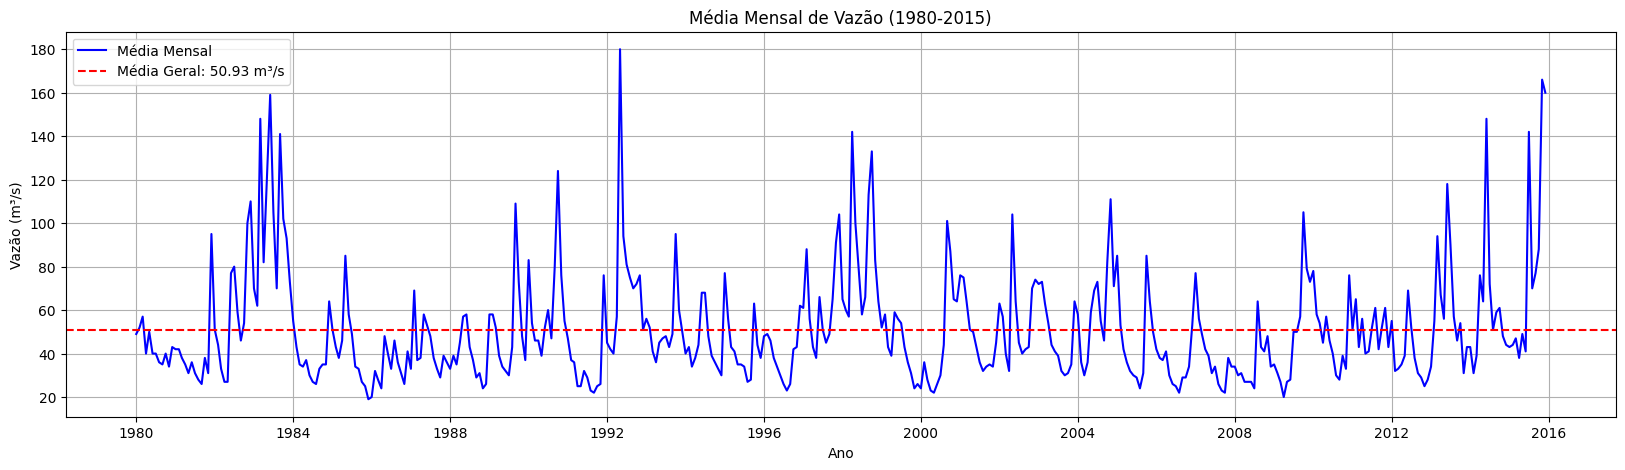

Número de meses com vazão abaixo da média geral: 267


In [39]:
import matplotlib.pyplot as plt
import pandas as pd

# Supondo que metSuperficie seja o DataFrame contendo seus dados
# Se a coluna 'datetime' não estiver no tipo datetime, converta-a
metSuperficie['datetime'] = pd.to_datetime(metSuperficie['datetime'])

# Converte a coluna 'Media' para valores numéricos, tratando erros como NaN
metSuperficie['Media'] = pd.to_numeric(metSuperficie['Media'], errors='coerce')

# Filtra os dados para o período de 1980 a 2015
metSuperficie_filtrado = metSuperficie[(metSuperficie['datetime'].dt.year >= 1980) & (metSuperficie['datetime'].dt.year <= 2015)]

# Calcula a média mensal
metSuperficie_filtrado['year_month'] = metSuperficie_filtrado['datetime'].dt.to_period('M')
media_mensal = metSuperficie_filtrado.groupby('year_month')['Media'].mean().reset_index()
media_mensal['year_month'] = media_mensal['year_month'].dt.to_timestamp()

# Calcula a média geral dos valores de vazão para todo o período
media_geral = metSuperficie_filtrado['Media'].mean()

# Conta o número de meses com vazão abaixo da média geral
meses_abaixo_media = media_mensal[media_mensal['Media'] < media_geral]['year_month'].count()

# Plota a média mensal
plt.figure(figsize=(20, 5))  # Define o tamanho da figura
plt.plot(media_mensal['year_month'], media_mensal['Media'], color='blue', label='Média Mensal')  # Plota os dados mensais
plt.axhline(y=media_geral, color='red', linestyle='--', label=f'Média Geral: {media_geral:.2f} m³/s')  # Adiciona a linha da média geral

plt.xlabel('Ano')  # Rótulo do eixo x
plt.ylabel('Vazão (m³/s)')  # Rótulo do eixo y com unidade
plt.title(f'Média Mensal de Vazão (1980-2015)')  # Título do gráfico com média geral
plt.grid(True)  # Adiciona uma grade ao gráfico
plt.legend()  # Mostra a legenda

plt.ticklabel_format(axis='y', style='plain')

plt.savefig('hidrograma_media_mensal_com_contagem.png', dpi=300, bbox_inches='tight')

plt.show()  # Mostra o gráfico

# Imprime o número de meses com vazão abaixo da média geral
print(f"Número de meses com vazão abaixo da média geral: {meses_abaixo_media}")


<Figure size 5000x1000 with 0 Axes>

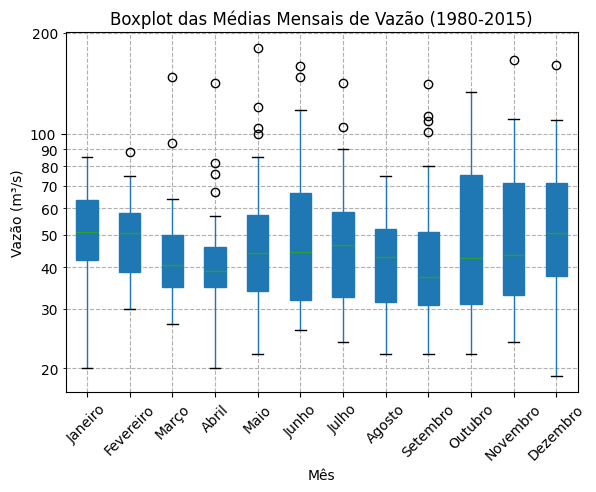

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Supondo que metSuperficie seja o DataFrame contendo seus dados
# Se a coluna 'datetime' não estiver no tipo datetime, converta-a
metSuperficie['datetime'] = pd.to_datetime(metSuperficie['datetime'])

# Converte a coluna 'Media' para valores numéricos, tratando erros como NaN
metSuperficie['Media'] = pd.to_numeric(metSuperficie['Media'], errors='coerce')

# Filtra os dados para o período de 1980 a 2015
metSuperficie_filtrado = metSuperficie[(metSuperficie['datetime'].dt.year >= 1980) & (metSuperficie['datetime'].dt.year <= 2015)]

# Calcula a média mensal
metSuperficie_filtrado['month'] = metSuperficie_filtrado['datetime'].dt.month

# Nomes dos meses em português
meses_portugues = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 
                   'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']

# Criando o boxplot para cada mês
plt.figure(figsize=(50, 10))
metSuperficie_filtrado.boxplot(column='Media', by='month', patch_artist=True)

# Substituindo os números dos meses pelos nomes em português e ajustando a rotação
plt.xticks(range(1, 13), meses_portugues, rotation=45)

# Define a escala logarítmica para o eixo y
plt.yscale('log')

# Ajusta os ticks do eixo Y para exibir múltiplos valores
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_minor_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=10))
ax.yaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs='auto', numticks=10))

plt.title('Boxplot das Médias Mensais de Vazão (1980-2015)')
plt.suptitle('')  # Remove o título adicional do boxplot por 'by'
plt.xlabel('Mês')
plt.ylabel('Vazão (m³/s)')
plt.grid(True, which="both", ls="--")  # Adiciona uma grade ao gráfico
plt.savefig('boxplot_media_mensal__________________oficial.png', dpi=300, bbox_inches='tight')

plt.show()

Média de vazão em Janeiro: 52.94 m³/s
Média de vazão em Fevereiro: 49.81 m³/s
Média de vazão em Março: 46.22 m³/s
Média de vazão em Abril: 44.28 m³/s
Média de vazão em Maio: 52.36 m³/s
Média de vazão em Junho: 55.28 m³/s
Média de vazão em Julho: 50.78 m³/s
Média de vazão em Agosto: 43.14 m³/s
Média de vazão em Setembro: 48.67 m³/s
Média de vazão em Outubro: 56.36 m³/s
Média de vazão em Novembro: 54.25 m³/s
Média de vazão em Dezembro: 57.11 m³/s


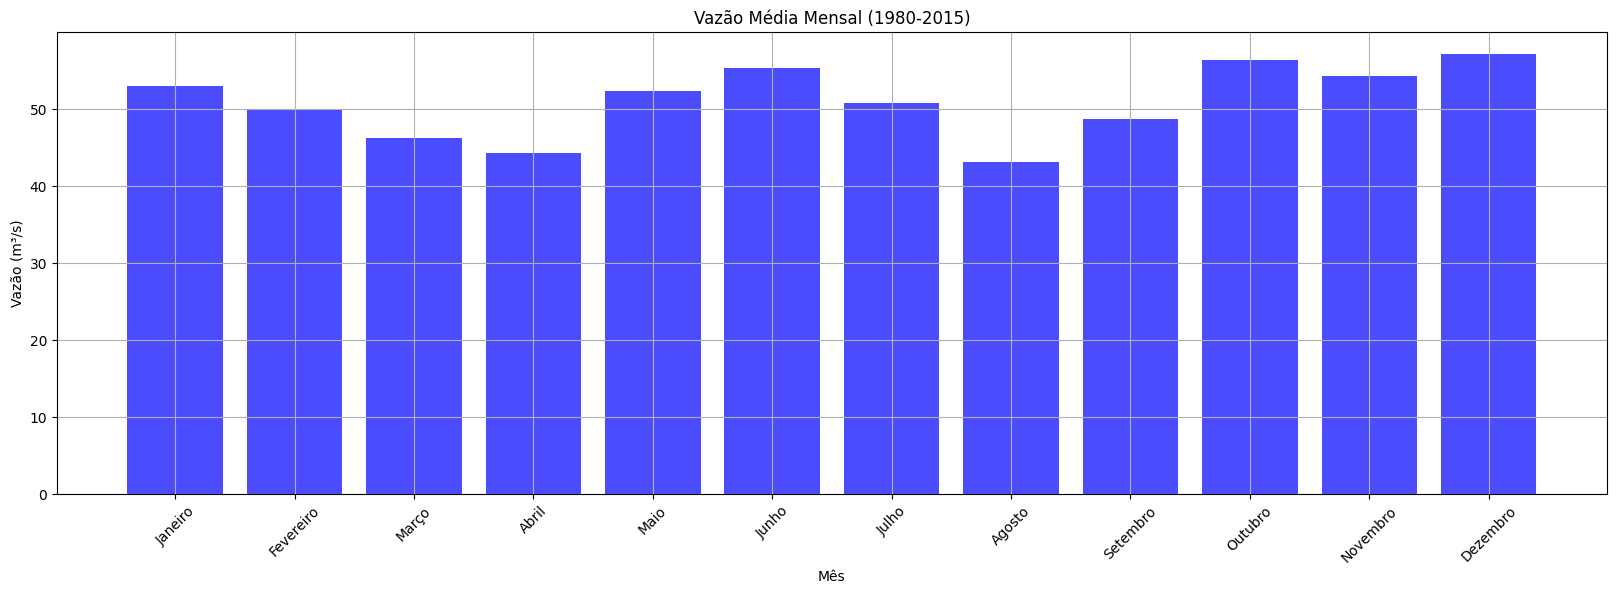

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

# Supondo que 'metSuperficie' seja seu DataFrame com os dados de vazões diárias

# Filtrar dados para o período desejado (exemplo: 1980 a 2015)
metSuperficie_filtrado = metSuperficie[(metSuperficie['datetime'].dt.year >= 1980) & (metSuperficie['datetime'].dt.year <= 2015)]

# Extrair o mês da data
metSuperficie_filtrado['month'] = metSuperficie_filtrado['datetime'].dt.month

# Calcular a média mensal de vazão da coluna "Media"
media_mensal = metSuperficie_filtrado.groupby('month')['Media'].mean().reset_index()

# Definir os nomes dos meses
nomes_meses = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']

# Imprimir as médias mensais
for index, mes in enumerate(nomes_meses):
    media = media_mensal.loc[media_mensal['month'] == index + 1, 'Media'].values[0]
    print(f'Média de vazão em {mes}: {media:.2f} m³/s')

# Plotar o gráfico de barras
plt.figure(figsize=(20, 6))
plt.bar(media_mensal['month'], media_mensal['Media'], color='blue', alpha=0.7)

plt.xlabel('Mês')
plt.ylabel('Vazão (m³/s)')
plt.title('Vazão Média Mensal (1980-2015)')
plt.xticks(media_mensal['month'], nomes_meses, rotation=45)  # Definir nomes dos meses como rótulos no eixo x
plt.grid(True)

plt.savefig('vazao_media_mensal_1980_2015.png', dpi=300, bbox_inches='tight')

plt.show()


Ano: 1980, Vazão Máxima: 177.00 m³/s
Ano: 1981, Vazão Máxima: 337.00 m³/s
Ano: 1982, Vazão Máxima: 368.00 m³/s
Ano: 1983, Vazão Máxima: 608.00 m³/s
Ano: 1984, Vazão Máxima: 183.00 m³/s
Ano: 1985, Vazão Máxima: 563.00 m³/s
Ano: 1986, Vazão Máxima: 93.00 m³/s
Ano: 1987, Vazão Máxima: 254.00 m³/s
Ano: 1988, Vazão Máxima: 155.00 m³/s
Ano: 1989, Vazão Máxima: 247.00 m³/s
Ano: 1990, Vazão Máxima: 225.00 m³/s
Ano: 1991, Vazão Máxima: 306.00 m³/s
Ano: 1992, Vazão Máxima: 461.00 m³/s
Ano: 1993, Vazão Máxima: 299.00 m³/s
Ano: 1994, Vazão Máxima: 242.00 m³/s
Ano: 1995, Vazão Máxima: 187.00 m³/s
Ano: 1996, Vazão Máxima: 127.00 m³/s
Ano: 1997, Vazão Máxima: 335.00 m³/s
Ano: 1998, Vazão Máxima: 376.00 m³/s
Ano: 1999, Vazão Máxima: 258.00 m³/s
Ano: 2000, Vazão Máxima: 244.00 m³/s
Ano: 2001, Vazão Máxima: 121.00 m³/s
Ano: 2002, Vazão Máxima: 422.00 m³/s
Ano: 2003, Vazão Máxima: 149.00 m³/s
Ano: 2004, Vazão Máxima: 255.00 m³/s
Ano: 2005, Vazão Máxima: 206.00 m³/s
Ano: 2006, Vazão Máxima: 130.00 m³/s
An

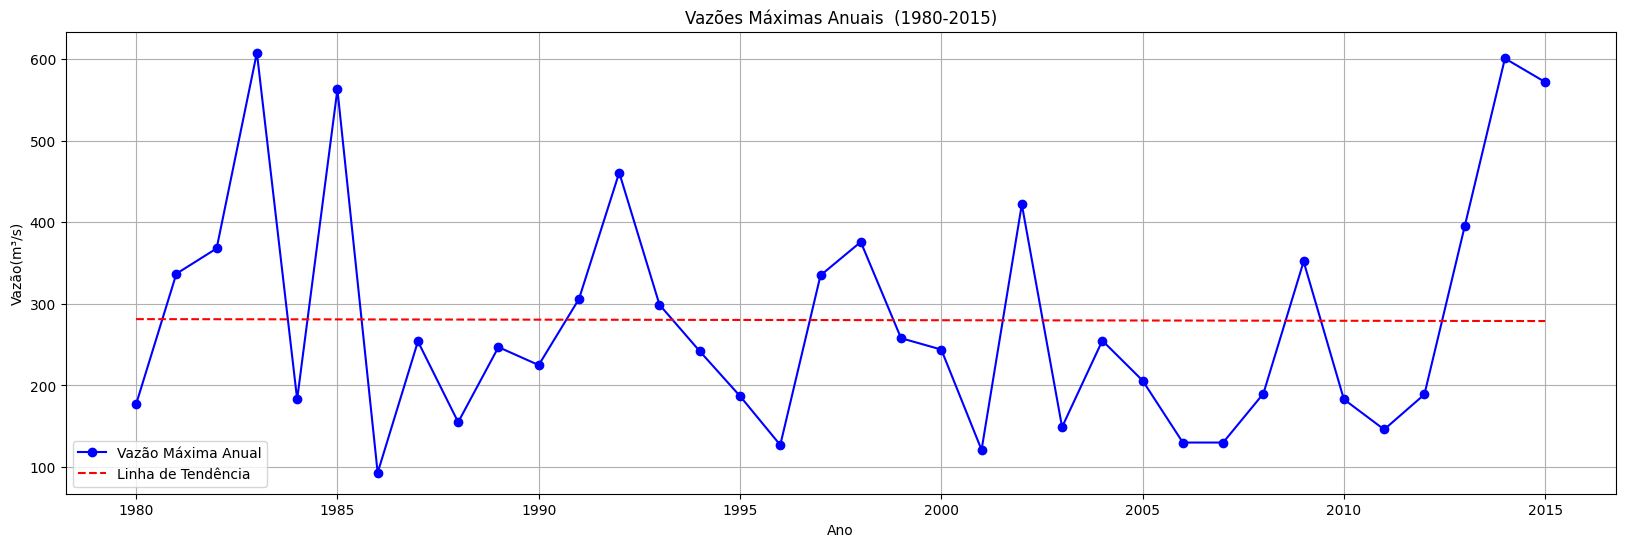

In [42]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

# Supondo que 'metSuperficie' seja seu DataFrame com os dados de vazões diárias

# Filtrar dados para o período desejado (exemplo: 1980 a 2015)
metSuperficie_filtrado = metSuperficie[(metSuperficie['datetime'].dt.year >= 1980) & (metSuperficie['datetime'].dt.year <= 2015)]

# Selecionar apenas as colunas de vazão diária (Vazao01 a Vazao31)
colunas_vazao = ['Vazao01', 'Vazao02', 'Vazao03', 'Vazao04', 'Vazao05', 'Vazao06', 'Vazao07', 'Vazao08', 'Vazao09', 'Vazao10',
                 'Vazao11', 'Vazao12', 'Vazao13', 'Vazao14', 'Vazao15', 'Vazao16', 'Vazao17', 'Vazao18', 'Vazao19', 'Vazao20',
                 'Vazao21', 'Vazao22', 'Vazao23', 'Vazao24', 'Vazao25', 'Vazao26', 'Vazao27', 'Vazao28', 'Vazao29', 'Vazao30',
                 'Vazao31']

# Calcular a vazão máxima de cada ano
metSuperficie_filtrado['VazaoMaxAnual'] = metSuperficie_filtrado[colunas_vazao].max(axis=1)

# Agrupar por ano e encontrar o máximo
vazao_maxima_anual = metSuperficie_filtrado.groupby(metSuperficie_filtrado['datetime'].dt.year)['VazaoMaxAnual'].max()

# Calcular a regressão linear
X = vazao_maxima_anual.index.values.reshape(-1, 1)  # Anos
y = vazao_maxima_anual.values.reshape(-1, 1)  # Vazões máximas anuais

model = LinearRegression()
model.fit(X, y)

# Prever os valores para a linha de tendência
y_pred = model.predict(X)

# Imprimir as vazões máximas anuais em formato de texto
for year, vazao in zip(vazao_maxima_anual.index, vazao_maxima_anual.values):
    print(f'Ano: {year}, Vazão Máxima: {vazao:.2f} m³/s')

# Plotar o gráfico de linha com a série de vazões máximas anuais e a linha de tendência
plt.figure(figsize=(20, 6))
plt.plot(vazao_maxima_anual.index, vazao_maxima_anual.values, marker='o', linestyle='-', color='blue', label='Vazão Máxima Anual')
plt.plot(vazao_maxima_anual.index, y_pred, linestyle='--', color='red', label='Linha de Tendência')

plt.xlabel('Ano')
plt.ylabel('Vazão(m³/s)')
plt.title('Vazões Máximas Anuais  (1980-2015)')
plt.grid(True)
plt.legend()

plt.savefig('serie_vazoes_maximas_anuais____________________Oficial.png', dpi=300, bbox_inches='tight')

plt.show()


Contagem de Observações em Cada Classe:
Classe 51.00-129.57: 12 observações
Classe 129.57-208.14: 13 observações
Classe 208.14-286.71: 4 observações
Classe 286.71-365.29: 3 observações
Classe 365.29-443.86: 1 observações
Classe 443.86-522.43: 2 observações
Classe 522.43-601.00: 1 observações


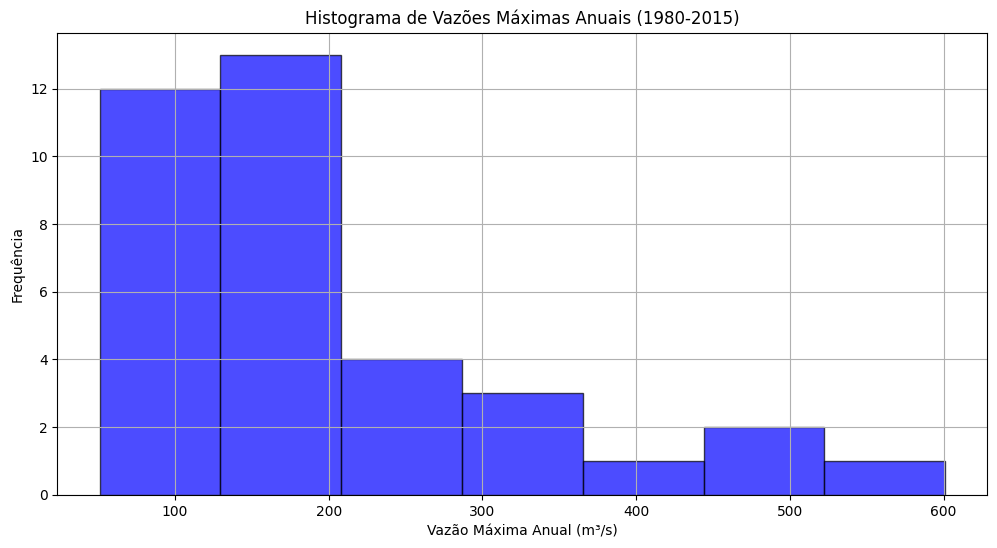

In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Supondo que 'metSuperficie' seja seu DataFrame com os dados de vazões diárias

# Filtrar dados para o período desejado (exemplo: 1980 a 2015)
metSuperficie_filtrado = metSuperficie[(metSuperficie['datetime'].dt.year >= 1980) & (metSuperficie['datetime'].dt.year <= 2015)]

# Calcular a vazão máxima de cada ano
metSuperficie_filtrado['VazaoMaxAnual'] = metSuperficie_filtrado[['Vazao01', 'Vazao02', 'Vazao03', 'Vazao04', 'Vazao05', 'Vazao06',
                                                                  'Vazao07', 'Vazao08', 'Vazao09', 'Vazao10', 'Vazao11', 'Vazao12']].max(axis=1)

# Preparar o histograma das vazões máximas anuais
vazoes_maximas_anuais = metSuperficie_filtrado.groupby(metSuperficie_filtrado['datetime'].dt.year)['VazaoMaxAnual'].max()

# Calcular o número de classes usando a fórmula de Sturges
n = len(vazoes_maximas_anuais)
k = int(np.ceil(1 + np.log2(n)))  # Arredonda para cima e converte para inteiro

# Calcular o histograma com o número de classes determinado por Sturges
hist, bins = np.histogram(vazoes_maximas_anuais, bins=k)

# Imprimir a contagem de forma separada
print("Contagem de Observações em Cada Classe:")
for i in range(len(hist)):
    print(f"Classe {bins[i]:.2f}-{bins[i+1]:.2f}: {hist[i]} observações")

# Plotar o histograma de contagens
plt.figure(figsize=(12, 6))
plt.hist(vazoes_maximas_anuais, bins=bins, edgecolor='black', color='blue', alpha=0.7)

plt.xlabel('Vazão Máxima Anual (m³/s)')
plt.ylabel('Frequência')
plt.title('Histograma de Vazões Máximas Anuais (1980-2015)')
plt.grid(True)

plt.savefig('histograma_vazoes_maximas_anuais..........................oficial.png', dpi=300, bbox_inches='tight')

plt.show()


Média dos logaritmos das vazões máximas anuais: 4.38
Desvio padrão amostral dos logaritmos das vazões máximas anuais: 0.63


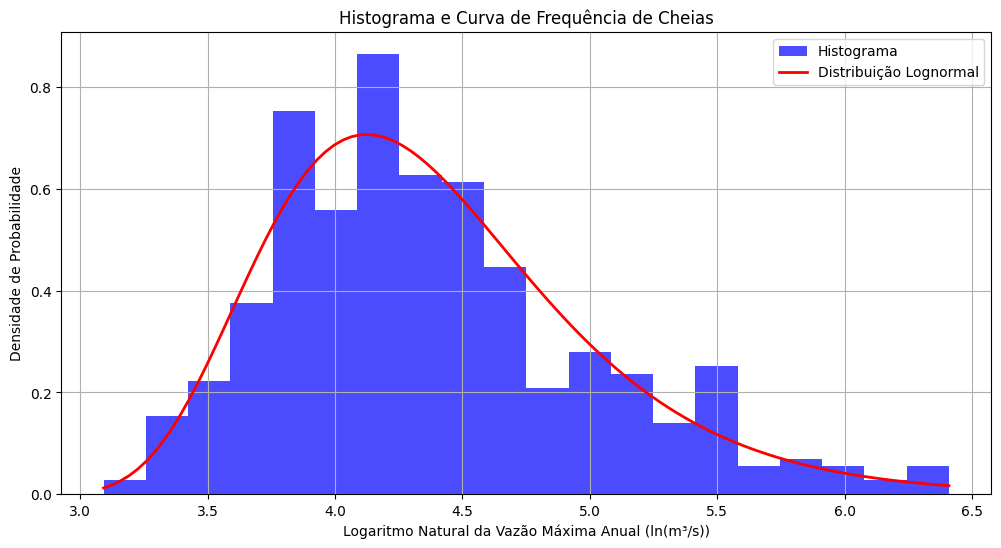

In [44]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import lognorm

# Supondo que 'metSuperficie' seja seu DataFrame com os dados de vazões diárias

# Filtrar dados para o período desejado (exemplo: 1980 a 2015)
metSuperficie_filtrado = metSuperficie[(metSuperficie['datetime'].dt.year >= 1980) & (metSuperficie['datetime'].dt.year <= 2015)]

# Selecionar apenas as colunas de vazão diária (Vazao01 a Vazao31)
colunas_vazao = ['Vazao01', 'Vazao02', 'Vazao03', 'Vazao04', 'Vazao05', 'Vazao06', 'Vazao07', 'Vazao08', 'Vazao09', 'Vazao10',
                 'Vazao11', 'Vazao12', 'Vazao13', 'Vazao14', 'Vazao15', 'Vazao16', 'Vazao17', 'Vazao18', 'Vazao19', 'Vazao20',
                 'Vazao21', 'Vazao22', 'Vazao23', 'Vazao24', 'Vazao25', 'Vazao26', 'Vazao27', 'Vazao28', 'Vazao29', 'Vazao30',
                 'Vazao31']

# Calcular a vazão máxima de cada ano
metSuperficie_filtrado['VazaoMaxAnual'] = metSuperficie_filtrado[colunas_vazao].max(axis=1)

# Calcular o logaritmo natural das vazões máximas anuais
log_vazao_maxima = np.log(metSuperficie_filtrado['VazaoMaxAnual'])

# Calcular média e desvio padrão amostral dos logaritmos das vazões máximas anuais
media_log = np.mean(log_vazao_maxima)
std_log = np.std(log_vazao_maxima, ddof=1)

print(f'Média dos logaritmos das vazões máximas anuais: {media_log:.2f}')
print(f'Desvio padrão amostral dos logaritmos das vazões máximas anuais: {std_log:.2f}')

# Ajustar a distribuição Lognormal aos dados
shape, loc, scale = lognorm.fit(log_vazao_maxima, loc=media_log, scale=np.exp(media_log))

# Gerar a curva teórica de frequência de cheias
x = np.linspace(log_vazao_maxima.min(), log_vazao_maxima.max(), 100)
pdf = lognorm.pdf(x, shape, loc, scale)

# Plotar o histograma das vazões máximas anuais
plt.figure(figsize=(12, 6))
plt.hist(log_vazao_maxima, bins=20, density=True, color='blue', alpha=0.7, label='Histograma')

# Plotar a curva de frequência de cheias (Lognormal)
plt.plot(x, pdf, 'r-', lw=2, label='Distribuição Lognormal')

plt.xlabel('Logaritmo Natural da Vazão Máxima Anual (ln(m³/s))')
plt.ylabel('Densidade de Probabilidade')
plt.title('Histograma e Curva de Frequência de Cheias')
plt.legend()
plt.grid(True)

plt.savefig('curva_frequencia_cheias_lognormal.png', dpi=300, bbox_inches='tight')

plt.show()
